In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_html('https://www.zippia.com/user-experience-designer-jobs/demographics/')
len(data)

19

In [3]:
table_data = data[1]
table_data

,Year,Male,Female
0,2010,61.88%,38.12%
1,2011,62.12%,37.88%
2,2012,61.35%,38.65%
3,2013,63.67%,36.33%
4,2014,61.60%,38.40%
5,2015,62.31%,37.69%
6,2016,61.25%,38.75%
7,2017,60.32%,39.68%
8,2018,62.43%,37.57%
9,2019,59.38%,40.62%


In [7]:
ux_data = pd.melt(
    table_data,
    id_vars = 'Year',
    value_vars =['Male', 'Female'],
    var_name = 'Gender',
    value_name = 'Percent'
)

ux_data['Percent'] = ux_data['Percent'].str.rstrip('%').astype('float')

ux_data = ux_data.astype({
    'Year': 'category',
    'Gender': 'category'
})

year_gender_group = ux_data.groupby(['Year', 'Gender'])

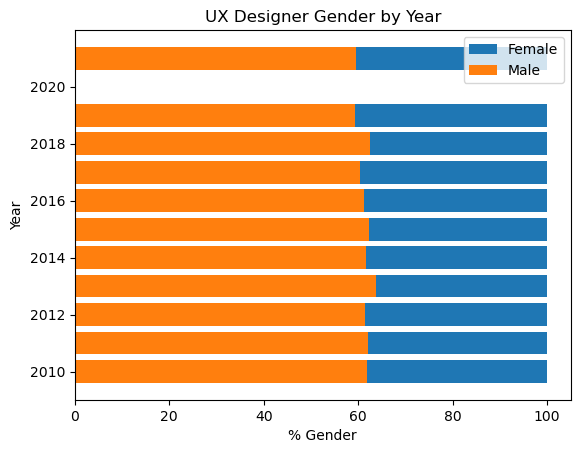

In [13]:
fig_1, ax_1 = plt.subplots()

for idx, o in year_gender_group:
    if o.Gender.item() =='Male':
        ax_1.barh(o.Year, o.Percent, left=0, label='Male', color="tab:orange")
    else:
        start_loc = 100 - o.Percent 
        ax_1.barh(o.Year, o.Percent, left=start_loc, label= 'Female', color="tab:blue")
            
ax_1.legend(['Female', 'Male'])

ax_1.set(xlabel='% Gender', ylabel= 'Year', title= 'UX Designer Gender by Year')

plt.show()

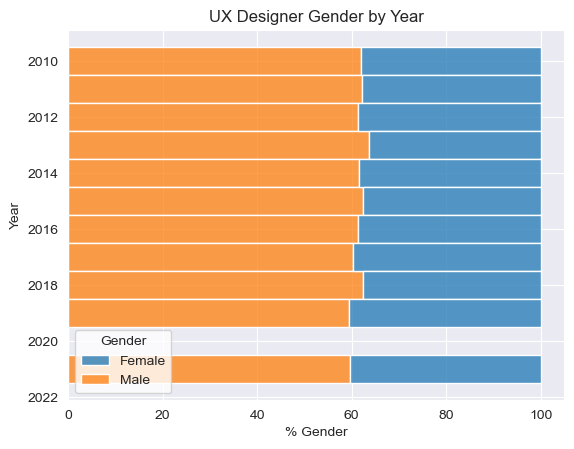

In [19]:
fig_2, ax_2 = plt.subplots()

sns.set_style('whitegrid')
##sns.set_context('')

sns.histplot(ux_data, y = 'Year', hue = 'Gender', weights = 'Percent', multiple = 'stack')

ax_2.set(xlabel='% Gender', ylabel= 'Year', title= 'UX Designer Gender by Year')

plt.show()

QUESTION 5
I noticed that it is very similar to matplotlib when making graphs but it is quicker because you don't have to manually put in each piece of information. I think seaborn might be used when you are trying to get somebody whether it be a client or your boss data. It is a great asset in data visualization and it is easy to interpret data.